In [ ]:
import pandas as pd
import shutil
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Section6_CP2_project/ham10000_dataset/GroundTruth.csv')

In [ ]:
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10015 non-null  object
 1   MEL     10015 non-null  int64 
 2   NV      10015 non-null  int64 
 3   BCC     10015 non-null  int64 
 4   AKIEC   10015 non-null  int64 
 5   BKL     10015 non-null  int64 
 6   DF      10015 non-null  int64 
 7   VASC    10015 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 626.1+ KB


In [ ]:
index = df.columns[1:]

In [ ]:
# 각 질병의 사진이 몇개씩 있는지 확인
for i in df.columns[1:]:
  print('{} : {}'.format(i, df['image'][df[i] == 1].count()))

MEL : 1113
NV : 6705
BCC : 514
AKIEC : 327
BKL : 1099
DF : 115
VASC : 142


In [ ]:
df['image'][df['BCC'] == 1]

25       ISIC_0024331
26       ISIC_0024332
39       ISIC_0024345
54       ISIC_0024360
97       ISIC_0024403
             ...     
9917     ISIC_0034223
9949     ISIC_0034255
9970     ISIC_0034276
9993     ISIC_0034299
10000    ISIC_0034306
Name: image, Length: 514, dtype: object

In [ ]:
len(df['image'].unique())

10015

In [ ]:
# one-hot encoding을 문자라벨로 변경

label_list = []

for j in range(len(df)):
  for i in df.columns[1:]:
    if df[i].iloc[j] == 1:
      label_list.append(i)

df['label'] = label_list
df = df.drop(columns = df.columns[1:-1])
df

,image,label
0,ISIC_0024306,NV
1,ISIC_0024307,NV
2,ISIC_0024308,NV
3,ISIC_0024309,NV
4,ISIC_0024310,MEL
...,...,...
10010,ISIC_0034316,MEL
10011,ISIC_0034317,MEL
10012,ISIC_0034318,BKL
10013,ISIC_0034319,NV


In [ ]:
df['label'].value_counts()
# 데이터셋의 one-hot encoding 전후의 라벨비율이 일치함.

NV       6705
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: label, dtype: int64

In [ ]:
# 라벨 비율 >> 불균형데이터

round(df['label'].value_counts(normalize = True) * 100, 2)

NV       66.95
MEL      11.11
BKL      10.97
BCC       5.13
AKIEC     3.27
VASC      1.42
DF        1.15
Name: label, dtype: float64

In [ ]:
index[2:]

Index(['BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')

In [ ]:
# 라벨통합

for i in range(len(df)):
  if df['label'].iloc[i] in index[2:]:
    df['label'].iloc[i] = 'Other_SC'

df['label'].value_counts()

NV          6705
Other_SC    2197
MEL         1113
Name: label, dtype: int64

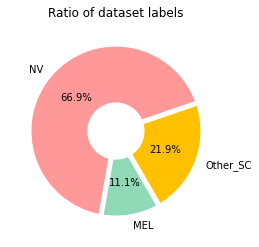

In [ ]:
ratio = df['label'].value_counts().values
labels = ['NV', 'Other_SC', 'MEL']
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('Ratio of dataset labels')
plt.show()

In [ ]:
labels

['NV', 'Other_SC', 'MEL']

In [ ]:
df.head(5)

,image,label
0,ISIC_0024306,NV
1,ISIC_0024307,NV
2,ISIC_0024308,NV
3,ISIC_0024309,NV
4,ISIC_0024310,MEL


In [ ]:
labels = list(df['label'].unique())
labels

['NV', 'MEL', 'Other_SC']

In [ ]:
# 이미지 및 마스크 옮기기

for i, j in zip(df['image'], df['label']):
  shutil.copyfile(f"/content/drive/MyDrive/Colab Notebooks/Section6_CP2_project/ham10000_dataset/images/{i}.jpg", f"/content/drive/MyDrive/Colab Notebooks/Section6_CP2_project/ham10000_dataset/new_data_v3/images/{j}/{i}.jpg")
  shutil.copyfile(f"/content/drive/MyDrive/Colab Notebooks/Section6_CP2_project/ham10000_dataset/masks/{i}_segmentation.png", f"/content/drive/MyDrive/Colab Notebooks/Section6_CP2_project/ham10000_dataset/new_data_v3/masks/{j}/{i}_segmentation.png")